# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y = np.sin(x)

In [3]:
print(x)

[-6.28318531 -6.22003772 -6.15689013 -6.09374253 -6.03059494 -5.96744735
 -5.90429976 -5.84115217 -5.77800458 -5.71485699 -5.6517094  -5.58856181
 -5.52541421 -5.46226662 -5.39911903 -5.33597144 -5.27282385 -5.20967626
 -5.14652867 -5.08338108 -5.02023349 -4.9570859  -4.8939383  -4.83079071
 -4.76764312 -4.70449553 -4.64134794 -4.57820035 -4.51505276 -4.45190517
 -4.38875758 -4.32560999 -4.26246239 -4.1993148  -4.13616721 -4.07301962
 -4.00987203 -3.94672444 -3.88357685 -3.82042926 -3.75728167 -3.69413408
 -3.63098648 -3.56783889 -3.5046913  -3.44154371 -3.37839612 -3.31524853
 -3.25210094 -3.18895335 -3.12580576 -3.06265816 -2.99951057 -2.93636298
 -2.87321539 -2.8100678  -2.74692021 -2.68377262 -2.62062503 -2.55747744
 -2.49432985 -2.43118225 -2.36803466 -2.30488707 -2.24173948 -2.17859189
 -2.1154443  -2.05229671 -1.98914912 -1.92600153 -1.86285394 -1.79970634
 -1.73655875 -1.67341116 -1.61026357 -1.54711598 -1.48396839 -1.4208208
 -1.35767321 -1.29452562 -1.23137803 -1.16823043 -1.

In [4]:
print(y)

[ 2.44929360e-16  6.31056313e-02  1.25959705e-01  1.88311666e-01
  2.49912962e-01  3.10518032e-01  3.69885285e-01  4.27778068e-01
  4.83965601e-01  5.38223906e-01  5.90336692e-01  6.40096223e-01
  6.87304143e-01  7.31772266e-01  7.73323331e-01  8.11791702e-01
  8.47024034e-01  8.78879879e-01  9.07232251e-01  9.31968129e-01
  9.52988909e-01  9.70210796e-01  9.83565137e-01  9.92998700e-01
  9.98473878e-01  9.99968847e-01  9.97477646e-01  9.91010207e-01
  9.80592311e-01  9.66265486e-01  9.48086844e-01  9.26128849e-01
  9.00479032e-01  8.71239643e-01  8.38527236e-01  8.02472214e-01
  7.63218303e-01  7.20921979e-01  6.75751849e-01  6.27887973e-01
  5.77521152e-01  5.24852163e-01  4.70090958e-01  4.13455834e-01
  3.55172553e-01  2.95473450e-01  2.34596503e-01  1.72784385e-01
  1.10283499e-01  4.73429900e-02 -1.57862420e-02 -7.88525454e-02
 -1.41604519e-01 -2.03792016e-01 -2.65167138e-01 -3.25485227e-01
 -3.84505835e-01 -4.41993691e-01 -4.97719629e-01 -5.51461512e-01
 -6.03005107e-01 -6.52144

In [5]:
X_train = np.c_[x**0, x**1, x**2, x**3, x**4, x**5]
print(X_train.shape)

(200, 6)


In [6]:
theta = np.zeros(X_train.shape[1])
# 泰勒展开式
theta[1] = 1
theta[3] = -1/6
theta[5] = -1/120
print(theta)

[ 0.          1.          0.         -0.16666667  0.         -0.00833333]


# Polynomial Regression

In [7]:
# 定义超参数
learning_rate = 1e-7
num_iterations = 100000

In [8]:
# 定义损失函数（均方误差 MSE）
def compute_cost(X, y, theta):
    cost = 0
    m = len(y)
    n = X.shape[1]
    predictions = np.zeros(m)
    
    for i in range(m):
        for j in range(n):
            predictions[i] += X[i][j] * theta[j]
        cost += (predictions[i] - y[i]) ** 2
    
    cost /= (2*m)
    return cost

# 梯度下降
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    n = X.shape[1]
    cost_history = np.zeros(num_iterations)
    
    for k in range(num_iterations):
        # 计算梯度
        predictions = np.zeros(m)
        for i in range(m):
            for j in range(n):
                predictions[i] += X[i][j] * theta[j]
        
        gradient = np.zeros(n)
        for j in range(n):
            for i in range(m):
                gradient[j] += (predictions[i] - y[i]) * X[i][j]
            gradient[j] /= m
        
        # 更新参数
        theta = theta - learning_rate * gradient
        
        # 记录损失
        cost_history[k] = compute_cost(X, y, theta)
        
    return theta, cost_history

# 训练模型
theta, cost_history = gradient_descent(X_train, y, theta, learning_rate, num_iterations)

# 预测函数
def predict(X, theta):
    return X.dot(theta)

# 使用模型进行预测
train_predictions = predict(X_train, theta)

# 评估模型
train_mse = compute_cost(X_train, y, theta)

print(f"训练集均方误差: {train_mse}")

训练集均方误差: 0.07212893770482816


In [9]:
print(theta)

[ 4.75674611e-19  1.00296079e+00  5.46611645e-18 -1.05179068e-01
 -7.32597982e-19  2.13634653e-03]


In [10]:
print(train_predictions.shape)

(200,)


In [11]:
print(train_predictions)

[-1.1325493  -0.81760027 -0.52800171 -0.26267639 -0.02057218  0.19933824
  0.39805757  0.57656421  0.73581247  0.87673287  1.00023236  1.1071946
  1.19848022  1.27492705  1.33735041  1.38654335  1.42327691  1.44830039
  1.46234156  1.466107    1.46028228  1.44553225  1.42250131  1.39181364
  1.35407347  1.30986536  1.2597544   1.20428652  1.14398873  1.07936939
  1.01091843  0.93910764  0.86439093  0.78720457  0.70796744  0.62708134
  0.54493117  0.46188525  0.37829554  0.29449791  0.21081242  0.12754354
  0.04498042 -0.03660284 -0.11694694 -0.19580713 -0.27295295 -0.34816796
 -0.4212495  -0.49200841 -0.5602688  -0.62586779 -0.68865521 -0.74849341
 -0.80525694 -0.85883234 -0.90911784 -0.95602315 -0.99946916 -1.03938771
 -1.07572131 -1.10842291 -1.13745563 -1.16279248 -1.18441615 -1.2023187
 -1.21650134 -1.22697417 -1.23375589 -1.23687359 -1.23636246 -1.23226554
 -1.22463346 -1.2135242  -1.19900279 -1.18114112 -1.16001761 -1.13571701
 -1.10833011 -1.0779535  -1.04468928 -1.00864486 -0.9

# Visualize

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# 展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

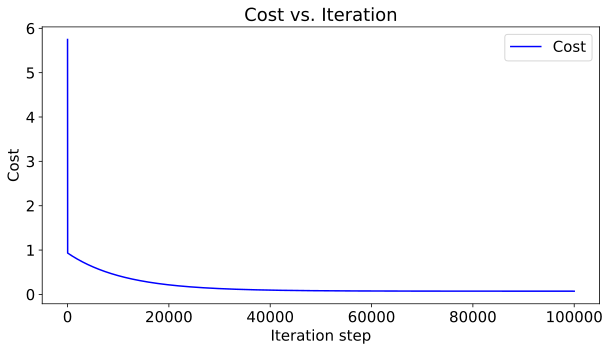

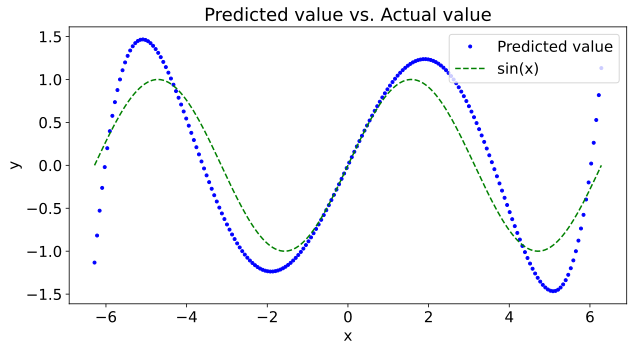

In [13]:
# 设置字体大小
plt.rcParams['font.size'] = 15  # 设置全局字体大小

# 可视化损失函数随迭代次数的变化
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), cost_history, 'b-', label='Cost')
plt.xlabel('Iteration step')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.legend()
plt.show()

# 绘制结果
plt.figure(figsize=(10, 5))
plt.plot(x, train_predictions, 'b.', label='Predicted value')
plt.plot(x, y, 'g--', label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Predicted value vs. Actual value')
plt.show()